**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [ ]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [ ]:
# Load Data
file_path = 'GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [ ]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [ ]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [ ]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [ ]:
# 3. Define the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.compile(optimizer='adam', loss='mean_absolute_error')

***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [ ]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=20, batch_size=30, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0893
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0898
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0903
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0892
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0879
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0896
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0907
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0938
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0868
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0916
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0902
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0904
Epoch 13/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0864
Epoch 14/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1034
Epoch 15/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0779
Epoch 16/25
5/5 ━━━━━━━━━━━━━━━━━━

In [ ]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step


In [ ]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

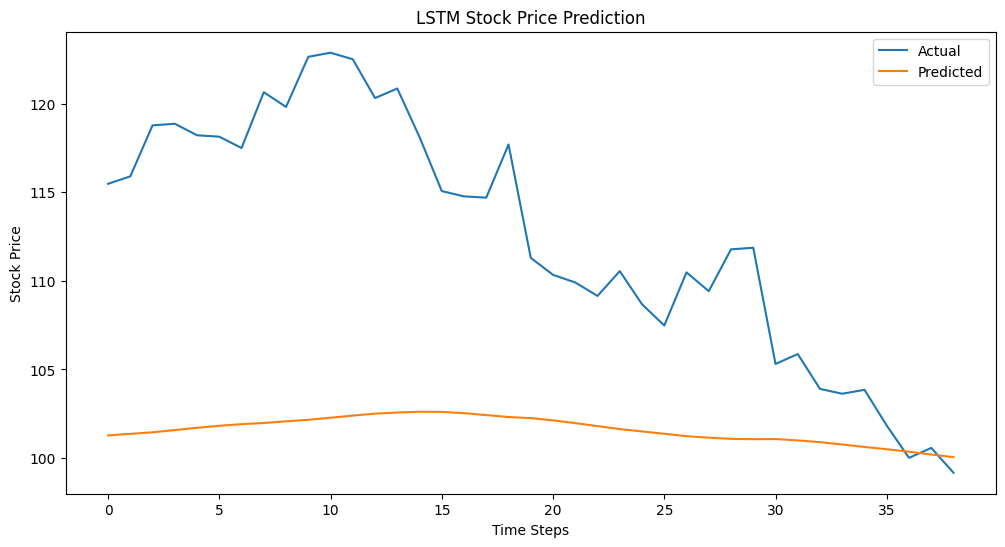

In [ ]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



**Answer the following questions.**

**Q1.**

Normalization ensures that all input values fall within a smaller range (e.g., 0–1). This helps the LSTM model converge faster during training, prevents large values from dominating the learning process, and improves stability and accuracy.

**Q2.**

The Dropout layer helps prevent overfitting by randomly ignoring a fraction of neurons during training. This forces the model to learn more robust patterns rather than memorizing the training data.


**Q3.**

It indicates that the LSTM model has successfully learned the underlying patterns in the stock price data and is making accurate predictions. A close alignment between the two lines means the model is generalizing well to unseen data.





